# 2022 빅콘테스트 

## 문제

앱 사용성 데이터를 통한 대출신청 예측분석


---


가명화된 데이터를 기반으로 고객의 대출상품 신청여부 예측
(2022년 3~5월 데이터제공 / 2022년 6월 예측)
* 예측모델을 활용하여 탐색적 데이터 분석 수행
* 대출신청, 미신청 고객을 분류하여 고객의 특성 분석결과 도출



- 회원 가입 이후 특정 기간안에 대출 신청 여부를 예측
  
- 핀다 홈화면 진입 고객의 모델 기반 고객 군집 분석
  
  모두가 대출을 원하진 않는다!
  
  여러 고객 군집별로 서비스 메시지를 제안한다.

- 비교대출 서비스
    - 최적의 대출 경험 제공
    - 고객 정보 제출 - 대출 조건을 받아 비교 선택
    - 핀다 사용자 **10명 중 6명은 중금리대출**
    - 인터넷 은행이 채우지 못한 중금리대출의 니즈를 채워줌
    - 핀다의 홈화면 진입 고객 중 특정 기간 안에 대출 신청 고객을 예측

<신청 과정>

- 홈화면을 통해 신청 시작
- 회원 가입을 통해 정보 수집
- 홈화면의 대출신청 버튼을 통해 대출목적, 희망금액 입력
- 자산정보입력
- 인증서 사용여부 선택
1. 회원 가입 이후 특정 기간안에 대출 신청 여부를 예측
    
    최종 모델평가는 승인된 상품 정보 기준 하나 이상을 선택해 대출한 고객을 예측하는 것
    
    → 예측 정확도 평가 지표 : (이진분류) F1-score
    
    모델링 정확도 만큼이나 데이터 분석, 모델링 과정을 평가에 반영
    
    label = 앱 사용자가 대출 조회를 하고, 승인된 금융상품 중 최소 하나를 선택하여 실제 대출을 실행한 경우 y로 표시
    
    학습 데이터와 시점상 크게 다르지 않음
    
    → 직전 데이터의 영향이 너무 크지 않도록
    
2. 핀다 홈화면 진입 고객의 모델 기반 고객 군집 분석
    
    앱 사용자 모두가 대출을 원하진 않는다!
    
    여러 고객 군집별로 서비스 메시지를 제안한다.
    
    통계적 군집 분석 과정의 타당성과 서비스 메시지의 독창성을 평가

## 결과 제출 방식

* target : loan_result['is_applied'] # 대출 신청여부

* PPT
1. 자유양식
2. 분량제한없음
3. 파워포인트(PPT)파일형식으로 제출 (파일명은 “분야명_주제명_개인/팀명＂으로 작성)
4. 필요시 설명자료(한글, 워드파일) 추가 제출 가능

## 심사 기준

	고객 당 대출 신청 여부 예측, 데이터 수집, 전처리 과정, 예측 모델 해석(필수)

## 이번에 주의할 것


* 탐색적 데이터 분석 수행이라고 박아놓은거 보면 EDA & 전처리 과정에 대한 "이유"를 상세히 적어놔야 할 것 같다

* 단순한 분류 accuracy 뿐 아니라 고객의 "특성 분석 결과"를 도출해내는 것이 중요한 것 같다



## 간략한 인사이트


* 유저 스펙에서 중요한 부분 : 은
* 유저 로그 데이터 어떻게 이용할지 -> count?

고객 스펙 -> 어떤게 추천이 되는지? 핀다 직접 깔아봐야겠다

추천된 것들 중에 고객이 선택할지 말지니까...


어플 이용층 : 젊은 층이 주로 사용하지 않을까 싶음

고객 스펙 데이터 중 나이를 알아보고 그 유저층이 무엇을 중요하게 생각하는지, 어떤 대출을 주로 받는지 인사이트 추가적으로 조사할 것?


유저 로그 데이터 -> 군집화에 주로 이용될듯

## 드라이브 마운트 & 저장 경로 설정

In [1]:
# 드라이브 마운트
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os

ROOT_DIR = "/content/gdrive/My Drive/빅콘테스트_2022/"
DATA_PATH = ROOT_DIR + "data/"
IMAGE_PATH = ROOT_DIR + "img/"

os.makedirs(DATA_PATH, exist_ok = True)
os.makedirs(IMAGE_PATH, exist_ok = True)

In [3]:
# 불필요한 경고 무시
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 데이터 불러오기 및 확인

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def load_data(file_name, DATA_PATH=DATA_PATH):
  file_path = os.path.join(DATA_PATH, file_name)
  return pd.read_csv(file_path)

In [6]:
user_spec = load_data("user_spec.csv")
log_data = load_data("log_data.csv")
loan_result = load_data("loan_result.csv")

In [7]:
user_spec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0


In [8]:
loan_result.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN


In [9]:
len(user_spec), len(loan_result) # row 개수 확인

(1394216, 13527363)

## 데이터프레임 병합

In [10]:
# loan_result, user_spec 'application id' 기준 left merge
merge_user_loan = pd.merge(loan_result, user_spec, how='left', on='application_id')
print(len(merge_user_loan))
merge_user_loan.head()

13527363


,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,430982.0,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,430982.0,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,430982.0,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,430982.0,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,430982.0,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0


## 학습용 데이터 / 예측할 데이터 분리

is_applied : NaN 값인 것 target으로 분리

In [11]:
merge_train = merge_user_loan[merge_user_loan['is_applied'].notnull()]
merge_target = merge_user_loan[merge_user_loan['is_applied'].isnull()]
print(f'total length : {len(merge_user_loan)}, train length : {len(merge_train)}, target length : {len(merge_target)}')

total length : 13527363, train length : 10270124, target length : 3257239


In [12]:
merge_train.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
13284,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0,346970.0,1970.0,1.0,...,EARNEDINCOME,201312.0,정규직,자가,10000000.0,생활비,0.0,NaN,12.0,162000000.0
13285,576643,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0,545882.0,1977.0,1.0,...,EARNEDINCOME,201908.0,정규직,전월세,20000000.0,생활비,0.0,NaN,7.0,106000000.0
13286,576643,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0,545882.0,1977.0,1.0,...,EARNEDINCOME,201908.0,정규직,전월세,20000000.0,생활비,0.0,NaN,7.0,106000000.0
13287,2136706,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0,558819.0,1983.0,1.0,...,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0
13288,2136706,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0,558819.0,1983.0,1.0,...,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0


## EDA

### 전체 통계치 확인

In [13]:
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10270124 entries, 13284 to 13519638
Data columns (total 23 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   loanapply_insert_time                object 
 2   bank_id                              int64  
 3   product_id                           int64  
 4   loan_limit                           float64
 5   loan_rate                            float64
 6   is_applied                           float64
 7   user_id                              float64
 8   birth_year                           float64
 9   gender                               float64
 10  insert_time                          object 
 11  credit_score                         float64
 12  yearly_income                        float64
 13  income_type                          object 
 14  company_enter_month                  float64
 15  employment_type           

In [14]:
merge_train.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                5738
loan_rate                                 5738
is_applied                                   0
user_id                                    113
birth_year                               91739
gender                                   91739
insert_time                                113
credit_score                           1243925
yearly_income                              113
income_type                                113
company_enter_month                     303681
employment_type                            113
houseown_type                              113
desired_amount                             113
purpose                                    113
personal_rehabilitation_yn             5873342
personal_rehabilitation_complete_yn    9232345
existing_loan

In [15]:
merge_target.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                1757
loan_rate                                 1757
is_applied                             3257239
user_id                                      0
birth_year                               36470
gender                                   36470
insert_time                                  0
credit_score                            265464
yearly_income                                6
income_type                                  0
company_enter_month                      96769
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn               15472
personal_rehabilitation_complete_yn    2561745
existing_loan

* train에서 data 결측치 있지만 target data에서는 모든 데이터 존재하는 column

   user_id, insert_time, income_type, employment_type, houseown_type, desired_amount, purpose

> 학습에서만 결측치 채우면 될듯



* 결측치 filling 방법에 대해 생각해봐야 할 column
  *   loan_rate : 승인한도
  *   credit_score : 신용점수
  *   yearly_income : 연소득
  *   company_enter_month : 입사연월
  *   personal_rehabilitation_yn : 개인회생자여부
  *   personal_rehabilitation_complete_yn : 개인회생자납입완료여부
  *   existing_loan_cnt : 기대출수
  *   existing_loan_amt : 기대출금액


In [16]:
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10270124 entries, 13284 to 13519638
Data columns (total 23 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   loanapply_insert_time                object 
 2   bank_id                              int64  
 3   product_id                           int64  
 4   loan_limit                           float64
 5   loan_rate                            float64
 6   is_applied                           float64
 7   user_id                              float64
 8   birth_year                           float64
 9   gender                               float64
 10  insert_time                          object 
 11  credit_score                         float64
 12  yearly_income                        float64
 13  income_type                          object 
 14  company_enter_month                  float64
 15  employment_type           

In [17]:
list(merge_train.columns)

['application_id',
 'loanapply_insert_time',
 'bank_id',
 'product_id',
 'loan_limit',
 'loan_rate',
 'is_applied',
 'user_id',
 'birth_year',
 'gender',
 'insert_time',
 'credit_score',
 'yearly_income',
 'income_type',
 'company_enter_month',
 'employment_type',
 'houseown_type',
 'desired_amount',
 'purpose',
 'personal_rehabilitation_yn',
 'personal_rehabilitation_complete_yn',
 'existing_loan_cnt',
 'existing_loan_amt']

In [18]:
id_col = ['application_id', 'user_id', 'product_id', 'bank_id']
time_col = ['loanapply_insert_time', 'insert_time']
cat_col = ['income_type', 'employment_type', 'houseown_type', 'purpose', 'gender', 'personal_rehabilitation_complete_yn', 'personal_rehabilitation_yn']
y_col = ['is_applied']

num_col = list(set(merge_train.columns) -set(id_col) - set(time_col) - set(cat_col) - set(y_col))
num_col

['desired_amount',
 'loan_limit',
 'existing_loan_amt',
 'credit_score',
 'loan_rate',
 'yearly_income',
 'company_enter_month',
 'birth_year',
 'existing_loan_cnt']

### 이산형 / 카테고리형 데이터 분포

변수별 개수, 고윳값부터 확인

In [19]:
for col in cat_col:
  print("### " + col + " value counts ###")
  print(merge_train[col].value_counts())

### income_type value counts ###
EARNEDINCOME       8715709
EARNEDINCOME2       471749
PRIVATEBUSINESS     372048
OTHERINCOME         305780
FREELANCER          247968
PRACTITIONER        156757
Name: income_type, dtype: int64
### employment_type value counts ###
정규직    8398785
계약직     903218
기타      829518
일용직     138490
Name: employment_type, dtype: int64
### houseown_type value counts ###
전월세       4594255
자가        2876280
기타가족소유    2787211
배우자         12265
Name: houseown_type, dtype: int64
### purpose value counts ###
생활비             5156402
대환대출            3066047
주택구입             433081
전월세보증금           426639
사업자금             418196
기타               303879
투자               219684
LIVING           107532
자동차구입             55759
SWITCHLOAN        33615
HOUSEDEPOSIT      15912
BUYHOUSE          10989
BUSINESS           8513
ETC                7374
INVEST             3634
BUYCAR             2755
Name: purpose, dtype: int64
### gender value counts ###
1.0    7060343
0.0    3118042


* purpose value 에서 다음과 같이 영문/한글명이 혼재되어있음을 확인했다.


생활비             5156402
대환대출            3066047
주택구입             433081
전월세보증금           426639
사업자금             418196
기타               303879
투자               219684
LIVING           107532
자동차구입             55759
SWITCHLOAN        33615
HOUSEDEPOSIT      15912
BUYHOUSE          10989
BUSINESS           8513
ETC                7374
INVEST             3634
BUYCAR             2755

#### 한글 value 영문으로 변환

In [20]:
# korean value to english
def kor_to_eng(df):

  df2 = df.copy()
  df2.replace({'employment_type':'정규직'}, 'PERMANENT', inplace=True)
  df2.replace({'employment_type':'계약직'}, 'CONTRACT', inplace=True)
  df2.replace({'employment_type':'일용직'}, 'DAYJOB', inplace=True)
  df2.replace({'employment_type':'기타'}, 'ETC', inplace=True)

  df2.replace({'houseown_type':'전월세'}, 'RENT', inplace=True)
  df2.replace({'houseown_type':'자가'}, 'OWN', inplace=True)
  df2.replace({'houseown_type':'기타가족소유'}, 'FAMILY_ETC', inplace=True)
  df2.replace({'houseown_type':'배우자'}, 'SPOUSE', inplace=True)

  df2.replace({'purpose':'생활비'}, 'LIVING', inplace=True)
  df2.replace({'purpose':'대환대출'}, 'SWITCHLOAN', inplace=True)
  df2.replace({'purpose':'주택구입'}, 'BUYHOUSE', inplace=True)
  df2.replace({'purpose':'전월세보증금'}, 'HOUSEDEPOSIT', inplace=True)
  df2.replace({'purpose':'사업자금'}, 'BUSINESS', inplace=True)
  df2.replace({'purpose':'기타'}, 'ETC', inplace=True)
  df2.replace({'purpose':'투자'}, 'INVEST', inplace=True)
  df2.replace({'purpose':'자동차구입'}, 'BUYCAR', inplace=True)

  return df2

In [21]:
merge_train = kor_to_eng(merge_train)
merge_target = kor_to_eng(merge_target)

In [22]:
for col in cat_col:
  print("### " + col + " value counts ###")
  print(merge_train[col].value_counts())

### income_type value counts ###
EARNEDINCOME       8715709
EARNEDINCOME2       471749
PRIVATEBUSINESS     372048
OTHERINCOME         305780
FREELANCER          247968
PRACTITIONER        156757
Name: income_type, dtype: int64
### employment_type value counts ###
PERMANENT    8398785
CONTRACT      903218
ETC           829518
DAYJOB        138490
Name: employment_type, dtype: int64
### houseown_type value counts ###
RENT          4594255
OWN           2876280
FAMILY_ETC    2787211
SPOUSE          12265
Name: houseown_type, dtype: int64
### purpose value counts ###
LIVING          5263934
SWITCHLOAN      3099662
BUYHOUSE         444070
HOUSEDEPOSIT     442551
BUSINESS         426709
ETC              311253
INVEST           223318
BUYCAR            58514
Name: purpose, dtype: int64
### gender value counts ###
1.0    7060343
0.0    3118042
Name: gender, dtype: int64
### personal_rehabilitation_complete_yn value counts ###
0.0    1033663
1.0       4116
Name: personal_rehabilitation_complete

In [23]:
for col in cat_col:
  print("### " + col + " value counts ###")
  print(merge_target[col].value_counts())

### income_type value counts ###
EARNEDINCOME       2751536
PRACTITIONER        128624
PRIVATEBUSINESS     122189
OTHERINCOME          97070
EARNEDINCOME2        92853
FREELANCER           64967
Name: income_type, dtype: int64
### employment_type value counts ###
PERMANENT    2667082
CONTRACT      287842
ETC           268716
DAYJOB         33599
Name: employment_type, dtype: int64
### houseown_type value counts ###
RENT          1430027
OWN            940986
FAMILY_ETC     885689
SPOUSE            537
Name: houseown_type, dtype: int64
### purpose value counts ###
LIVING          1672304
SWITCHLOAN      1007315
HOUSEDEPOSIT     142645
BUYHOUSE         136598
BUSINESS         133374
ETC               96205
INVEST            65986
BUYCAR             2812
Name: purpose, dtype: int64
### gender value counts ###
1.0    2225869
0.0     994900
Name: gender, dtype: int64
### personal_rehabilitation_complete_yn value counts ###
0.0    692959
1.0      2535
Name: personal_rehabilitation_complete_y

#### [시각화, countplot] 카테고리형 분포 

In [24]:
# histogram plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 드라이브에 이미지 파일 저장
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
  print(path)
  print("그림 저장 : ", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# plot size = (m,n) 튜플 형태로 입력
# col_list = 해당 데이터프레임에서 count plot으로 출력할 column들의 string list
def count_plot(figsize, plotnum, data, col_list, title):
  fig = plt.figure(figsize=figsize)
  r, c = plotnum
  fig_num = r*c

  for idx in range(1,len(col_list)+1):
    col = col_list[idx-1]
    ax = fig.add_subplot(r,c,idx)
    ax = sns.countplot(data=data[col], x=data[col].values)
    ax.set_title(col)

  plt.title(title)
  save_fig(title)
  plt.show()

/content/gdrive/My Drive/빅콘테스트_2022/img/categorical value countplot.png
그림 저장 :  categorical value countplot


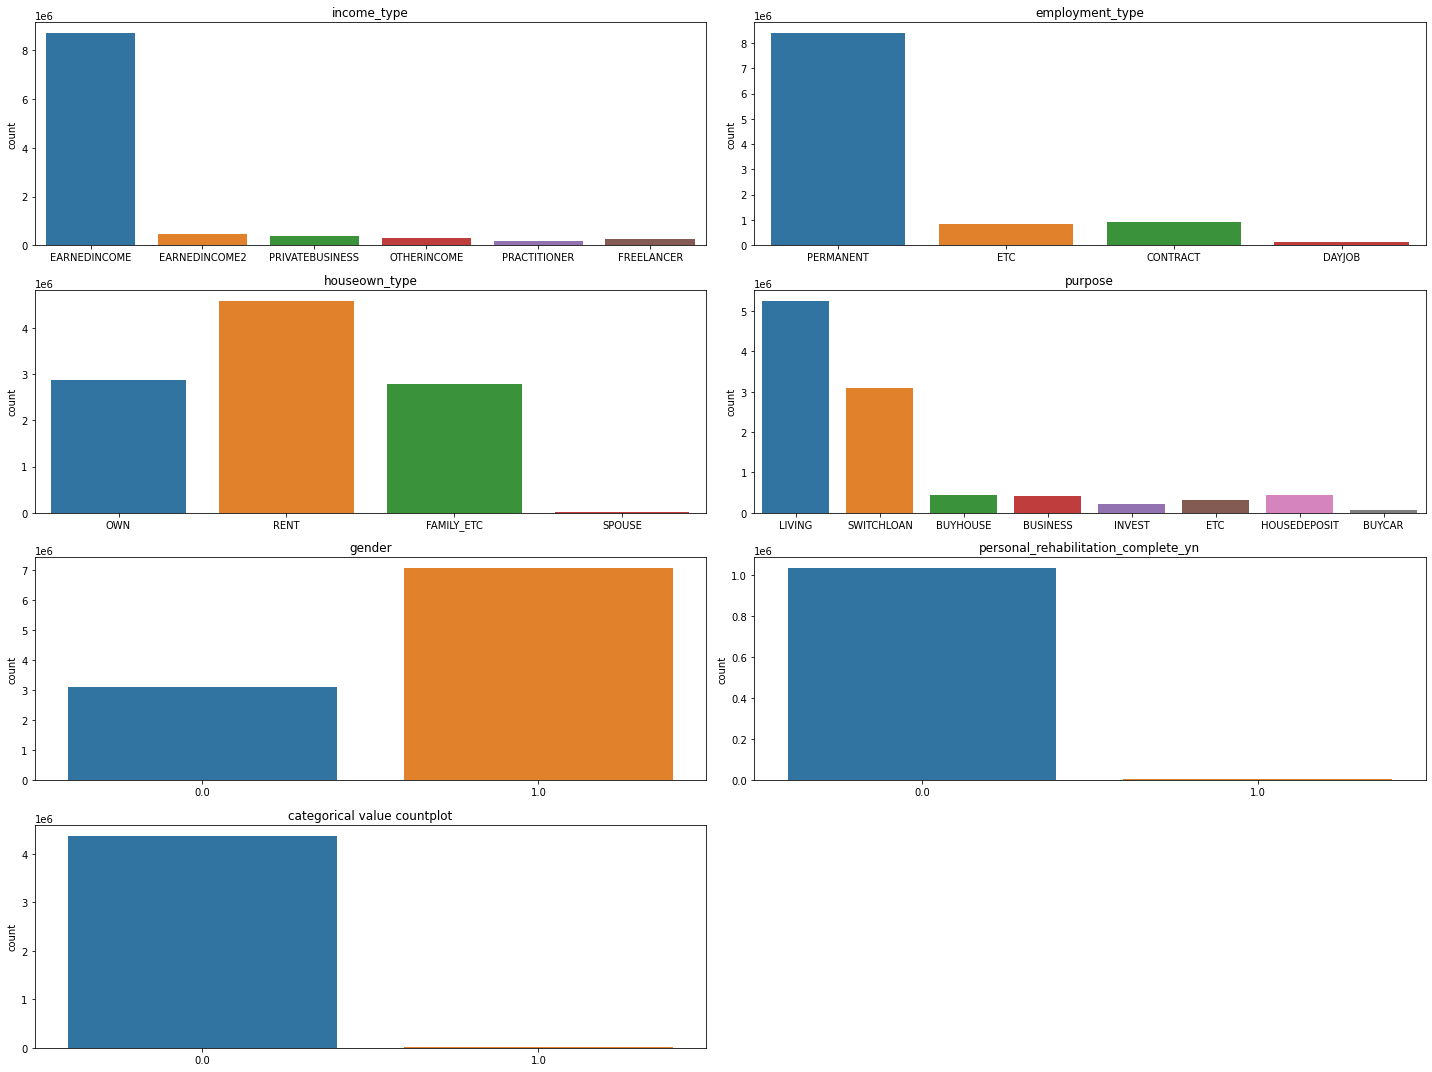

In [25]:
count_plot(figsize=(20,15), plotnum=(4,2), data=merge_train, col_list=cat_col, title="categorical value countplot")

In [26]:
merge_train['bank_id'].value_counts()

35    601000
38    491762
59    376950
33    328537
49    316309
       ...  
60     30613
2      29504
39      6919
9       3982
16         5
Name: bank_id, Length: 62, dtype: int64

In [27]:
print(len(merge_train['bank_id'].unique()))

62


In [28]:
merge_train['product_id'].value_counts()

150    224417
61     215587
36     210833
110    197352
56     188540
        ...  
165         3
55          2
211         1
225         1
53          1
Name: product_id, Length: 178, dtype: int64

In [29]:
print(len(merge_train['product_id'].unique()))

178


#### [시각화, countplot] 타깃 분포

/content/gdrive/My Drive/빅콘테스트_2022/img/target value countplot.png
그림 저장 :  target value countplot


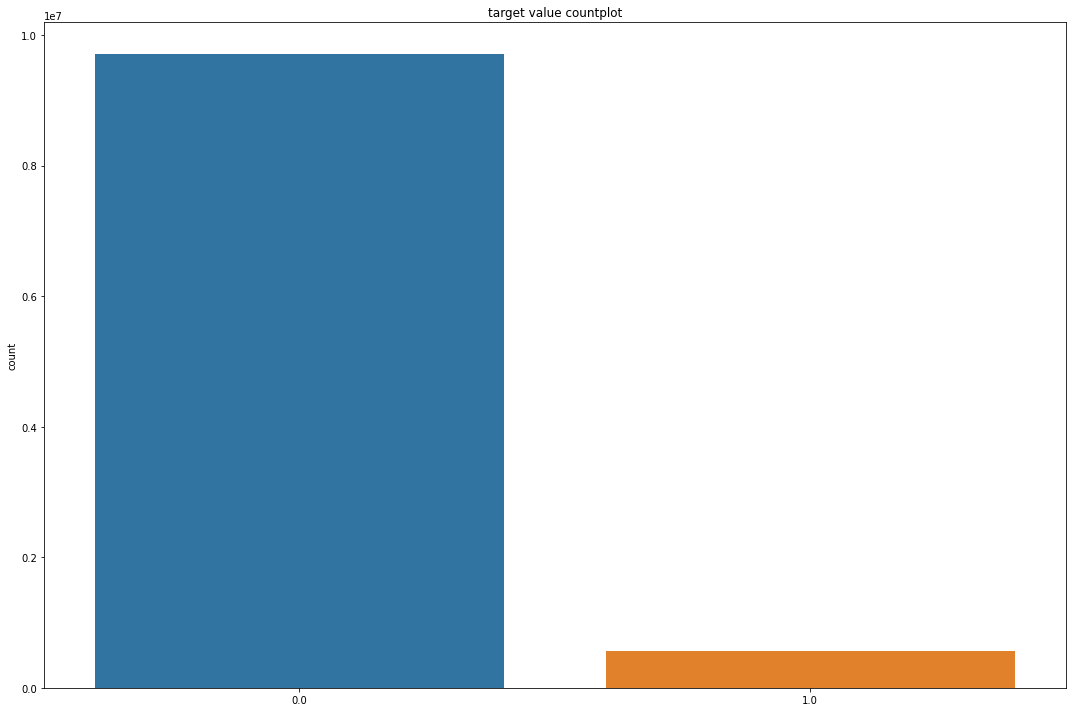

In [30]:
count_plot(figsize=(15,10), plotnum=(1,1), data=merge_train, col_list=y_col, title="target value countplot")

타깃이 심각하게 불균형. 오버샘플링 등의 추가적인 기법 활용 필요

### 수치형 데이터 분포

#### 통계

In [24]:
merge_train[num_col].isnull().sum()

desired_amount             113
loan_limit                5738
existing_loan_amt      3044253
credit_score           1243925
loan_rate                 5738
yearly_income              113
company_enter_month     303681
birth_year               91739
existing_loan_cnt      2143924
dtype: int64

In [25]:
merge_train[num_col].describe()

,desired_amount,loan_limit,existing_loan_amt,credit_score,loan_rate,yearly_income,company_enter_month,birth_year,existing_loan_cnt
count,1.027001e+07,1.026439e+07,7.225871e+06,9.026199e+06,1.026439e+07,1.027001e+07,9.966443e+06,1.017838e+07,8.126200e+06
mean,5.159147e+07,2.260828e+07,8.167405e+07,7.500421e+02,1.276589e+01,4.791943e+07,2.017741e+05,1.982782e+03,3.645592e+00
std,2.323399e+08,2.230741e+07,9.824103e+07,1.274872e+02,3.886452e+00,1.318759e+08,5.427454e+02,9.641009e+00,3.145768e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02,1.500000e+00,0.000000e+00,1.911090e+05,1.930000e+03,1.000000e+00
25%,1.000000e+07,9.000000e+06,2.500000e+07,6.500000e+02,9.500000e+00,2.900000e+07,2.017010e+05,1.976000e+03,1.000000e+00
50%,2.800000e+07,1.800000e+07,4.900000e+07,7.300000e+02,1.320000e+01,3.600000e+07,2.020030e+05,1.984000e+03,3.000000e+00
75%,5.000000e+07,3.300000e+07,9.600000e+07,8.600000e+02,1.580000e+01,5.000000e+07,2.021070e+05,1.990000e+03,5.000000e+00
max,1.000000e+10,1.000000e+10,7.512000e+09,1.000000e+03,2.000000e+01,1.000000e+10,2.022110e+05,2.003000e+03,1.780000e+02


#### [시각화, histplot] 수치형 분포


reference

* https://seaborn.pydata.org/generated/seaborn.displot.html

* https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiddwannabe&logNo=221728411362

* https://suy379.tistory.com/122


/content/gdrive/My Drive/빅콘테스트_2022/img/numerical value histplot.png
그림 저장 :  numerical value histplot


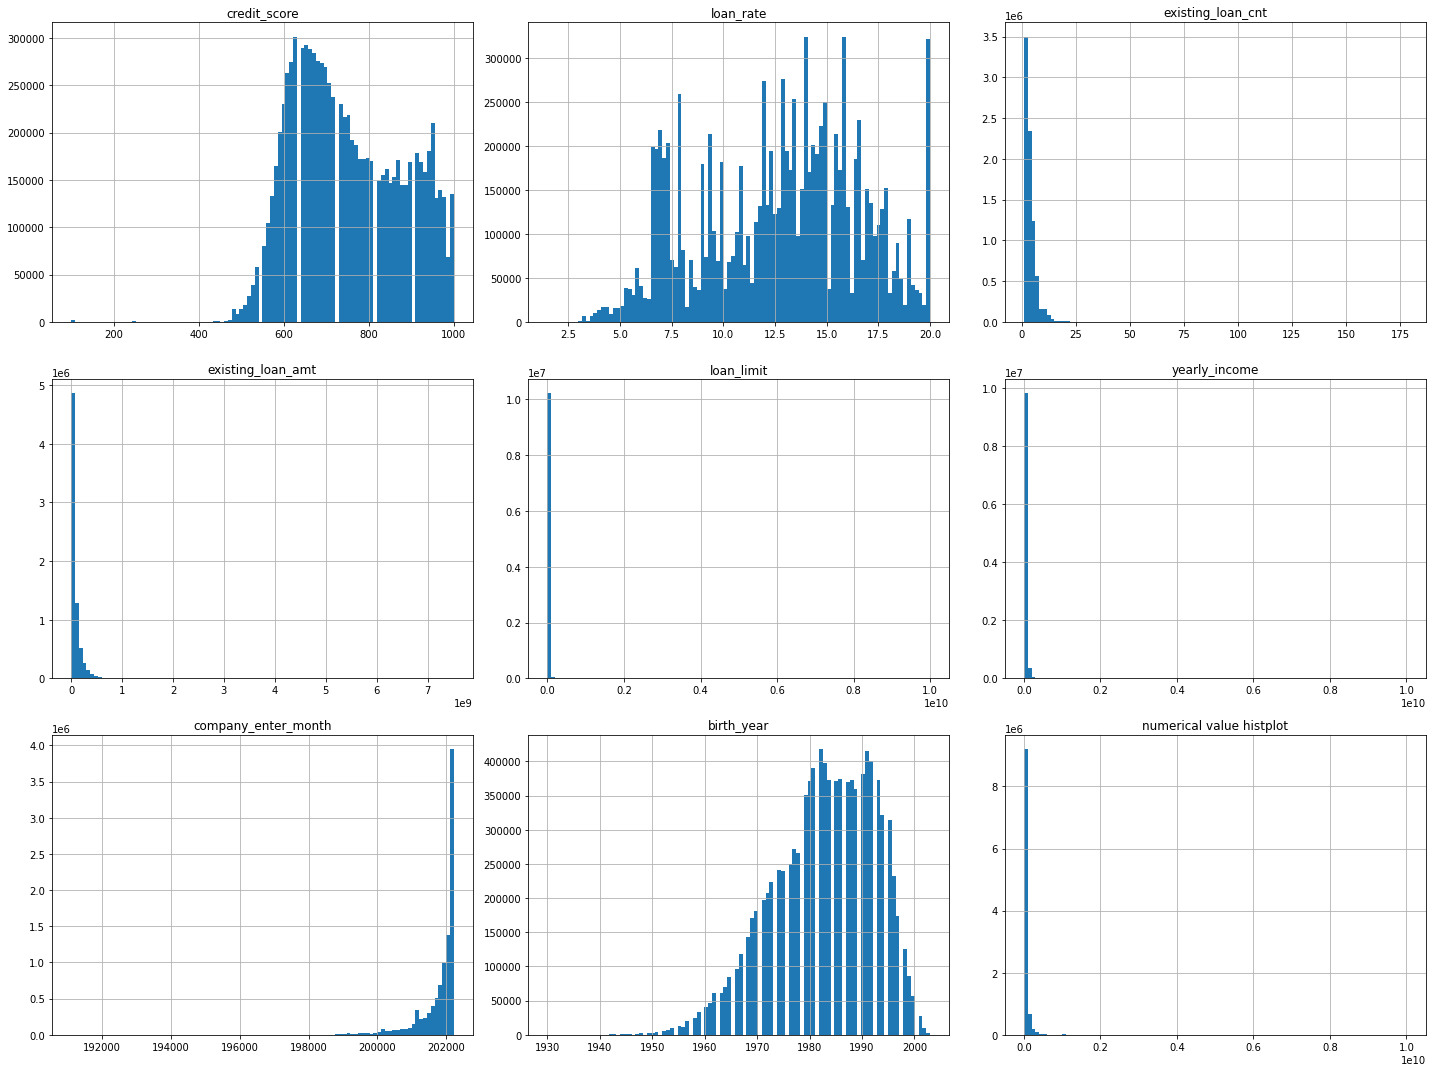

In [33]:
merge_train[num_col].hist(bins=100, figsize=(20,15))
plt.title("numerical value histplot")
save_fig("numerical value histplot")

* yearly_income : 이상치 판별
* company enter month : fillna (0), month 대신 year 단위로 삽입
* credit_score : 이상치 판별
* existing_loan_cnt : 이상치 판별



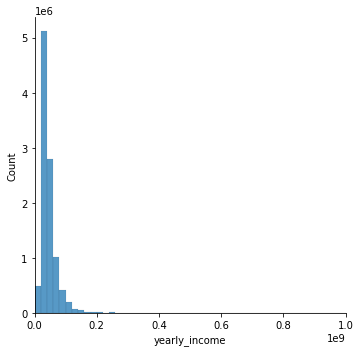

In [34]:
sns.displot(merge_train['yearly_income'], bins=500)
plt.xlim(0, merge_train['yearly_income'].max() / 10)
plt.show()

In [35]:
merge_train['yearly_income'].max()

10000000000.0

yearly_income이 최대치인 경우 -> 다른 요소 고려해서 이상치인지 아닌지 판단!


In [36]:
max_income = merge_train[merge_train['yearly_income'] == merge_train['yearly_income'].max()]

In [37]:
max_income['user_id'].unique()

array([580362., 169742.])

In [38]:
max_income.groupby(['user_id']).mean()

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
user_id,,,,,,,,,,,,,,,,
169742.0,922944.586667,33.613333,133.866667,5.562667e+07,8.949333,0.0,1981.0,0.0,1000.0,1.000000e+10,200807.0,1.000000e+10,NaN,NaN,NaN,NaN
580362.0,553804.545455,11.000000,128.454545,1.518182e+07,17.100000,0.0,1992.0,1.0,810.0,1.000000e+10,201251.0,2.000000e+08,0.0,NaN,5.0,20000000.0


yearly_income이 최소치인 경우 -> 다른 요소 고려해서 이상치인지 아닌지 판단

In [39]:
merge_train[merge_train['yearly_income'] == merge_train['yearly_income'].min()]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
14826,1978734,2022-05-09 18:09:12,15,204,5000000.0,13.9,0.0,629950.0,1999.0,0.0,...,OTHERINCOME,NaN,ETC,RENT,3000000.0,HOUSEDEPOSIT,0.0,0.0,1.0,NaN
14827,1978734,2022-05-09 18:09:11,35,29,5000000.0,17.4,0.0,629950.0,1999.0,0.0,...,OTHERINCOME,NaN,ETC,RENT,3000000.0,HOUSEDEPOSIT,0.0,0.0,1.0,NaN
14828,1978734,2022-05-09 18:09:11,13,123,3000000.0,20.0,0.0,629950.0,1999.0,0.0,...,OTHERINCOME,NaN,ETC,RENT,3000000.0,HOUSEDEPOSIT,0.0,0.0,1.0,NaN
15519,821680,2022-05-09 23:21:42,29,265,3000000.0,10.9,1.0,675403.0,1996.0,0.0,...,OTHERINCOME,NaN,ETC,RENT,5000000.0,SWITCHLOAN,0.0,0.0,11.0,18000000.0
15520,821680,2022-05-09 23:21:42,13,123,9000000.0,20.0,1.0,675403.0,1996.0,0.0,...,OTHERINCOME,NaN,ETC,RENT,5000000.0,SWITCHLOAN,0.0,0.0,11.0,18000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13517862,660225,2022-05-16 19:50:58,29,75,20000000.0,8.9,0.0,53497.0,1992.0,1.0,...,OTHERINCOME,NaN,ETC,RENT,30000000.0,LIVING,0.0,0.0,3.0,19000000.0
13517863,660225,2022-05-16 19:50:33,13,123,20000000.0,17.5,0.0,53497.0,1992.0,1.0,...,OTHERINCOME,NaN,ETC,RENT,30000000.0,LIVING,0.0,0.0,3.0,19000000.0
13519313,987337,2022-05-16 12:21:43,29,75,18000000.0,9.4,1.0,508855.0,1992.0,0.0,...,OTHERINCOME,NaN,ETC,FAMILY_ETC,20000000.0,SWITCHLOAN,0.0,0.0,4.0,28000000.0
13519314,744414,2022-05-16 11:41:12,29,75,18000000.0,9.4,1.0,508855.0,1992.0,0.0,...,OTHERINCOME,NaN,ETC,FAMILY_ETC,30000000.0,SWITCHLOAN,0.0,0.0,4.0,28000000.0


user id가 nan값인 경우를 제외한 후 각 column의 결측치

In [40]:
tmp = merge_train[merge_train['user_id'].notnull()]

In [41]:
tmp.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                5625
loan_rate                                 5625
is_applied                                   0
user_id                                      0
birth_year                               91626
gender                                   91626
insert_time                                  0
credit_score                           1243812
yearly_income                                0
income_type                                  0
company_enter_month                     303568
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5873229
personal_rehabilitation_complete_yn    9232232
existing_loan

In [42]:
tmp2 = tmp[(tmp['loan_limit'].isnull()) & (tmp['loan_rate'].isnull())]
tmp2

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
14516,138330,2022-05-09 10:34:28,51,21,NaN,NaN,1.0,511565.0,1985.0,1.0,...,EARNEDINCOME,202012.0,PERMANENT,FAMILY_ETC,16000000.0,SWITCHLOAN,0.0,NaN,1.0,NaN
15772,345505,2022-05-09 12:26:25,38,16,NaN,NaN,1.0,502879.0,1967.0,1.0,...,EARNEDINCOME,202001.0,PERMANENT,FAMILY_ETC,5000000.0,LIVING,0.0,NaN,3.0,15000000.0
15913,1411021,2022-05-09 11:56:31,29,180,NaN,NaN,1.0,726640.0,1978.0,0.0,...,OTHERINCOME,NaN,ETC,RENT,5000000.0,LIVING,0.0,NaN,4.0,56000000.0
16728,812584,2022-05-09 10:39:50,51,21,NaN,NaN,1.0,84400.0,1983.0,1.0,...,EARNEDINCOME,202201.0,PERMANENT,FAMILY_ETC,10000000.0,LIVING,0.0,NaN,5.0,41000000.0
24483,692640,2022-05-09 09:15:14,30,86,NaN,NaN,1.0,601805.0,1985.0,1.0,...,EARNEDINCOME,202105.0,PERMANENT,RENT,5000000.0,SWITCHLOAN,0.0,NaN,3.0,4000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13506342,1982217,2022-05-16 11:44:07,29,265,NaN,NaN,1.0,603819.0,1984.0,1.0,...,EARNEDINCOME,201908.0,PERMANENT,RENT,50000000.0,SWITCHLOAN,0.0,0.0,4.0,56000000.0
13507946,1041425,2022-05-16 02:40:38,29,180,NaN,NaN,1.0,60333.0,1981.0,1.0,...,EARNEDINCOME,202009.0,PERMANENT,RENT,100000000.0,LIVING,0.0,NaN,3.0,68000000.0
13508408,175654,2022-05-16 10:24:30,51,21,NaN,NaN,1.0,121434.0,1990.0,0.0,...,EARNEDINCOME,202004.0,PERMANENT,RENT,23000000.0,LIVING,0.0,0.0,NaN,NaN
13517356,1130799,2022-05-16 12:47:32,29,180,NaN,NaN,1.0,842671.0,1983.0,0.0,...,EARNEDINCOME,202203.0,PERMANENT,OWN,5000000.0,LIVING,0.0,NaN,7.0,64000000.0


In [43]:
len(tmp2['application_id'].unique()) # 승인한도, 승인금리 존재하지 않는 상품 개수

5610

In [44]:
tmp2.groupby(['application_id']).count()

,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,insert_time,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
application_id,,,,,,,,,,,,,,,,,,,,,
631,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
696,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,1
837,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,1
873,1,1,1,0,0,1,1,1,1,1,...,1,0,1,1,1,1,1,1,0,0
1128,1,1,1,0,0,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166111,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,1
2166134,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
2166555,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1


credit_score - desired amount scatter plot

In [45]:
# # bivariate plot - 두 변수 간 상관관계 플롯
# sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm")

## 전처리

### 결측치 처리 & 스케일링

In [26]:
# 특정 조건에 맞는 df 반환하는 함수

# data = dataframe
# condition = (df.pclass == 1) | (df.pclass == 2)
# col = [col1, col2 ...]

def search_row(data, condition, col=None):
  if col != None:
    new_df = data.loc[condition, [col]]
  else:
    new_df = data.loc[condition]
  return new_df

#### user_id

user_id null일경우 drop - train data만 해당

In [27]:
merge_train = search_row(merge_train, merge_train.user_id.notnull())

In [28]:
merge_train.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                5625
loan_rate                                 5625
is_applied                                   0
user_id                                      0
birth_year                               91626
gender                                   91626
insert_time                                  0
credit_score                           1243812
yearly_income                                0
income_type                                  0
company_enter_month                     303568
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5873229
personal_rehabilitation_complete_yn    9232232
existing_loan

#### 결측치 다른 기록으로 채우기 (fill_from_others)

In [29]:
# df : 원본 데이터프레임
# col : 결측치를 채우고 싶은 컬럼
# id : 기준 컬럼

def fill_from_others(df, col, id_col):

  # df에서 채울 column의 unique list 추출
  tofill = search_row(df, df[col].isnull(), id_col)[id_col].unique()

  # not null인 이전 applicate 기록에서 원하는 기록 가져오기
  condition = (merge_user_loan[col].notnull()) & (merge_user_loan[id_col].isin(tofill))

  tmp = search_row(merge_user_loan, condition)
  filling_series = tmp.groupby([id_col]).mean()[col]

  filling_df = pd.DataFrame(filling_series, columns=[col])
  filling_df = filling_df.reset_index(level=0)

  for idx, id in enumerate(filling_df[id_col]):
    cond = (df[id_col] == id)
    df.loc[cond, col] = filling_df.loc[idx, col]
  
  return df

#### birth year



다른 대출 기록으로 NA값 filling

In [30]:
merge_train = fill_from_others(merge_train, 'birth_year', 'user_id')
merge_target = fill_from_others(merge_target, 'birth_year', 'user_id')

결측치 중앙값으로 채우기

In [31]:
merge_train['birth_year'] = merge_train['birth_year'].fillna(merge_train['birth_year'].median())
merge_target['birth_year'] = merge_target['birth_year'].fillna(merge_target['birth_year'].median())

In [32]:
merge_train.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                5625
loan_rate                                 5625
is_applied                                   0
user_id                                      0
birth_year                                   0
gender                                   91626
insert_time                                  0
credit_score                           1243812
yearly_income                                0
income_type                                  0
company_enter_month                     303568
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5873229
personal_rehabilitation_complete_yn    9232232
existing_loan

연도 대신 나이로 변환 (int형)

In [33]:
from datetime import datetime

now = datetime.now()
print(now.year)

2022


In [34]:
merge_train['age'] = now.year - merge_train['birth_year']
merge_train.drop('birth_year', axis=1, inplace=True)

(array([7.148710e+05, 2.569722e+06, 2.757265e+06, 2.382291e+06,
        1.243217e+06, 4.606560e+05, 1.251760e+05, 1.399300e+04,
        2.495000e+03, 3.250000e+02]),
 array([19. , 26.3, 33.6, 40.9, 48.2, 55.5, 62.8, 70.1, 77.4, 84.7, 92. ]),
 <a list of 10 Patch objects>)

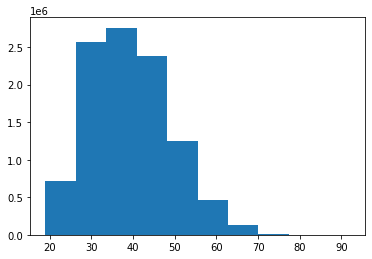

In [35]:
plt.hist(merge_train['age'])

In [36]:
merge_target['age'] = now.year - merge_target['birth_year']
merge_target.drop('birth_year', axis=1, inplace=True)

#### gender

다른 대출 기록으로 NA값 filling

In [37]:
merge_train = fill_from_others(merge_train, 'gender', 'user_id')
merge_train.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                5625
loan_rate                                 5625
is_applied                                   0
user_id                                      0
gender                                   77267
insert_time                                  0
credit_score                           1243812
yearly_income                                0
income_type                                  0
company_enter_month                     303568
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5873229
personal_rehabilitation_complete_yn    9232232
existing_loan_cnt                      2143811
existing_loan

In [38]:
merge_target = fill_from_others(merge_target, 'gender', 'user_id')

결측치 2(분류 없음) 로 채우기

In [39]:
merge_train['gender'] = merge_train['gender'].fillna(2)
merge_target['gender'] = merge_target['gender'].fillna(2)

(array([3124067.,       0.,       0.,       0.,       0., 7068677.,
              0.,       0.,       0.,   77267.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

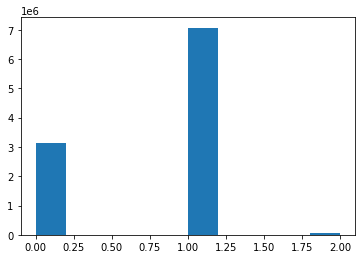

In [40]:
plt.hist(merge_train['gender'])

#### insert_time


user id drop 후 결측치는 모두 제거됨

#### credit_score

다른 대출 기록으로 NA값 filling

-> 금융 대출 기록에 따라 신용점수 바뀌었을 수도 있음. 이전 기록 그냥 갖다쓰면 안될듯

일단 중앙값으로 채운 다음 구간 나누기

In [41]:
merge_train['credit_score'] = merge_train['credit_score'].fillna(merge_train['credit_score'].median())
merge_target['credit_score'] = merge_target['credit_score'].fillna(merge_target['credit_score'].median())

In [42]:
merge_target.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                1757
loan_rate                                 1757
is_applied                             3257239
user_id                                      0
gender                                       0
insert_time                                  0
credit_score                                 0
yearly_income                                6
income_type                                  0
company_enter_month                      96769
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn               15472
personal_rehabilitation_complete_yn    2561745
existing_loan_cnt                       541898
existing_loan

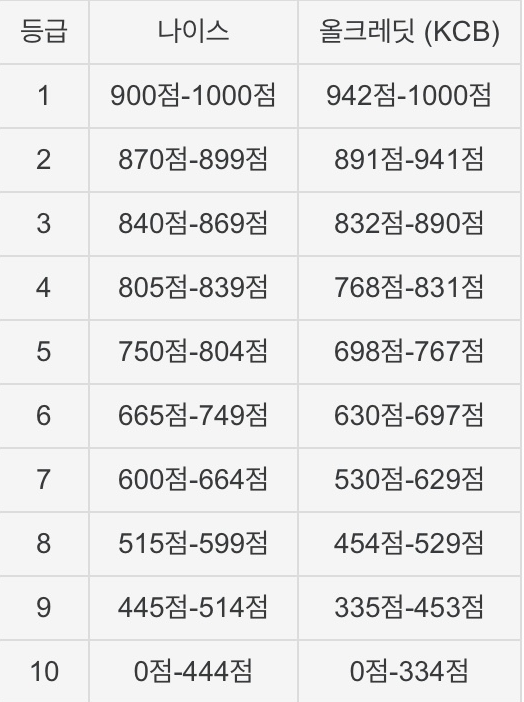

나이스의 신용등급 책정 기준으로 credit score를 binning 한다

In [43]:
bins = [0, 444, 514, 599, 664, 749, 804, 839, 869, 899, 1000]

def binning_credit_score(df):
  binned_score = pd.cut(df['credit_score'], bins=bins, labels=range(10))
  return binned_score

In [44]:
merge_train['credit_score_cut'] = binning_credit_score(merge_train)
merge_train['credit_score_cut'].value_counts()

4    3280934
3    1938156
9    1668825
5    1114848
2     807266
6     473932
7     461328
8     461056
1      57811
0       5855
Name: credit_score_cut, dtype: int64

In [45]:
merge_target['credit_score_cut'] = binning_credit_score(merge_target)
merge_target['credit_score_cut'].value_counts()

4    938427
9    605676
3    597223
5    371031
2    234730
6    166799
7    162775
8    161879
1     17463
0      1236
Name: credit_score_cut, dtype: int64

In [46]:
merge_train.drop('credit_score', axis=1, inplace=True)
merge_target.drop('credit_score', axis=1, inplace=True)

In [47]:
merge_train.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                5625
loan_rate                                 5625
is_applied                                   0
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
company_enter_month                     303568
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5873229
personal_rehabilitation_complete_yn    9232232
existing_loan_cnt                      2143811
existing_loan_amt                      3044140
age          

In [48]:
merge_target.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                1757
loan_rate                                 1757
is_applied                             3257239
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                6
income_type                                  0
company_enter_month                      96769
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn               15472
personal_rehabilitation_complete_yn    2561745
existing_loan_cnt                       541898
existing_loan_amt                       846023
age          

#### loan_rate, loan_limit

target 1 // 신중하게 결측치 filling 접근할 것

처리 시간 오래 걸림 -> 개선방안

In [49]:
len(merge_train[merge_train['loan_rate'].isnull()]['is_applied']), merge_train[merge_train['loan_limit'].isnull()]['is_applied'].count()

(5625, 5625)

In [50]:
len(merge_train['product_id'].unique())

178

In [51]:
loan_rate_na = merge_train[merge_train['loan_rate'].isnull()]
loan_rate_na

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,gender,insert_time,...,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,credit_score_cut
14516,138330,2022-05-09 10:34:28,51,21,NaN,NaN,1.0,511565.0,1.0,2022-05-06 13:45:51,...,PERMANENT,FAMILY_ETC,16000000.0,SWITCHLOAN,0.0,NaN,1.0,NaN,37.0,2
15772,345505,2022-05-09 12:26:25,38,16,NaN,NaN,1.0,502879.0,1.0,2022-05-09 12:26:25,...,PERMANENT,FAMILY_ETC,5000000.0,LIVING,0.0,NaN,3.0,15000000.0,55.0,3
15913,1411021,2022-05-09 11:56:31,29,180,NaN,NaN,1.0,726640.0,0.0,2022-05-08 22:38:47,...,ETC,RENT,5000000.0,LIVING,0.0,NaN,4.0,56000000.0,44.0,2
16728,812584,2022-05-09 10:39:50,51,21,NaN,NaN,1.0,84400.0,1.0,2022-05-06 08:57:53,...,PERMANENT,FAMILY_ETC,10000000.0,LIVING,0.0,NaN,5.0,41000000.0,39.0,2
24483,692640,2022-05-09 09:15:14,30,86,NaN,NaN,1.0,601805.0,1.0,2022-05-07 21:56:53,...,PERMANENT,RENT,5000000.0,SWITCHLOAN,0.0,NaN,3.0,4000000.0,37.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13506342,1982217,2022-05-16 11:44:07,29,265,NaN,NaN,1.0,603819.0,1.0,2022-05-16 11:44:06,...,PERMANENT,RENT,50000000.0,SWITCHLOAN,0.0,0.0,4.0,56000000.0,38.0,4
13507946,1041425,2022-05-16 02:40:38,29,180,NaN,NaN,1.0,60333.0,1.0,2022-05-12 12:14:18,...,PERMANENT,RENT,100000000.0,LIVING,0.0,NaN,3.0,68000000.0,41.0,3
13508408,175654,2022-05-16 10:24:30,51,21,NaN,NaN,1.0,121434.0,0.0,2022-05-15 20:53:09,...,PERMANENT,RENT,23000000.0,LIVING,0.0,0.0,NaN,NaN,32.0,4
13517356,1130799,2022-05-16 12:47:32,29,180,NaN,NaN,1.0,842671.0,0.0,2022-05-13 21:50:01,...,PERMANENT,OWN,5000000.0,LIVING,0.0,NaN,7.0,64000000.0,39.0,3


In [52]:
len(loan_rate_na['product_id'].unique()) # 총 69개의 상품 -- 절반 가까이 되는 상품의 loan_rate, loan_limit 존재 X

69

In [53]:
len(loan_rate_na['user_id'].unique()) # 총 5041명의 고객

5041

In [54]:
merge_train.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                5625
loan_rate                                 5625
is_applied                                   0
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
company_enter_month                     303568
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5873229
personal_rehabilitation_complete_yn    9232232
existing_loan_cnt                      2143811
existing_loan_amt                      3044140
age          

In [55]:
merge_train = fill_from_others(merge_train, 'loan_limit', 'user_id')
merge_train = fill_from_others(merge_train, 'loan_rate', 'user_id')
merge_train.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   8
loan_rate                                    8
is_applied                                   0
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
company_enter_month                     303568
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5873229
personal_rehabilitation_complete_yn    9232232
existing_loan_cnt                      2143811
existing_loan_amt                      3044140
age          

In [56]:
merge_target = fill_from_others(merge_target, 'loan_limit', 'user_id')
merge_target = fill_from_others(merge_target, 'loan_rate', 'user_id')
merge_target.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   2
loan_rate                                    2
is_applied                             3257239
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                6
income_type                                  0
company_enter_month                      96769
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn               15472
personal_rehabilitation_complete_yn    2561745
existing_loan_cnt                       541898
existing_loan_amt                       846023
age          

loan_limit, loan_rate 결측치가 각각 8, 2개의 row만 제외하고 모두 채워짐

나머지 row에 대해서는 median 값으로 결측치 보충

In [57]:
merge_train['loan_limit'] = merge_train['loan_limit'].fillna(merge_train['loan_limit'].median())
merge_train['loan_rate'] = merge_train['loan_rate'].fillna(merge_train['loan_rate'].median())

merge_target['loan_limit'] = merge_target['loan_limit'].fillna(merge_target['loan_limit'].median())
merge_target['loan_rate'] = merge_target['loan_rate'].fillna(merge_target['loan_rate'].median())

In [58]:
merge_train.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                                   0
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
company_enter_month                     303568
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5873229
personal_rehabilitation_complete_yn    9232232
existing_loan_cnt                      2143811
existing_loan_amt                      3044140
age          

In [59]:
merge_target.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                             3257239
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                6
income_type                                  0
company_enter_month                      96769
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn               15472
personal_rehabilitation_complete_yn    2561745
existing_loan_cnt                       541898
existing_loan_amt                       846023
age          

#### yearly_income

로그 스케일링

In [60]:
# 결측치 채우기
merge_train = fill_from_others(merge_train, 'yearly_income', 'user_id')
merge_target = fill_from_others(merge_target, 'yearly_income', 'user_id')

In [61]:
merge_train['yearly_income'] = np.log1p(merge_train['yearly_income'])
merge_target['yearly_income'] = np.log1p(merge_target['yearly_income'])

In [62]:
merge_train.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                                   0
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
company_enter_month                     303568
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5873229
personal_rehabilitation_complete_yn    9232232
existing_loan_cnt                      2143811
existing_loan_amt                      3044140
age          

In [63]:
merge_target.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                             3257239
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
company_enter_month                      96769
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn               15472
personal_rehabilitation_complete_yn    2561745
existing_loan_cnt                       541898
existing_loan_amt                       846023
age          

#### company_enter_month

현재시간으로 결측치 채우기

datetime으로 자료형 변환 후 개월 수 계산해서 넣기

In [64]:
from datetime import datetime

now = datetime.now() # 현재 datetime 계산

In [65]:
def cal_company_month(dataframe):
  df = dataframe.copy()
  df['company_enter_month'] = df['company_enter_month'].fillna('0') # ValueError 발생 막기 위해 결측치부터 채우기
  now_series = pd.Series([now] * len(df)) # 현재 시간 series로 생성

  df['company_enter_month'] = df['company_enter_month'].astype('int') # int형으로 변환 (소수점 자르기)
  df['company_enter_month'] = df['company_enter_month'].astype('str') # 문자형으로 변환

  df['company_enter_month'] = df['company_enter_month'].str.slice(start=0, stop=6) # 일 단위 잘라내기

  df.replace({'company_enter_month': {'0' : now}}, inplace=True) # 현재 시간으로 결측치 채우기

  # 나머지 값들 datetime으로 자료형 변환
  df['company_enter_month'] = df['company_enter_month'].apply(lambda x : datetime.strptime(x, '%Y%m') if type(x) != datetime else x)

  df['company_month'] = (now - df['company_enter_month']).dt.days # 재직일수 계산
  df['company_month'] /= 30 # 개월 수 계산해서 열에 삽입
  df['company_month'] = df['company_month'].astype('int')

  df.drop(['company_enter_month'], axis=1, inplace=True)

  return df

In [66]:
# train에서는 year, month만 존재
merge_train['company_enter_month'].value_counts()

202201.0    401043
202112.0    329308
202111.0    326445
202110.0    312566
202109.0    264029
             ...  
198402.0         1
198009.0         1
197910.0         1
198210.0         1
191601.0         1
Name: company_enter_month, Length: 515, dtype: int64

In [67]:
merge_train = cal_company_month(merge_train)

In [68]:
merge_train['company_month'].value_counts()

8       401043
9       329308
10      326445
11      312566
0       303568
         ...  
1299         1
486          1
512          1
470          1
521          1
Name: company_month, Length: 513, dtype: int64

target에서 변환 안되는 경우 - value error 발생

In [69]:
# target에서는 year, month, day 존재하는 행과 year,month 존재하는 행 혼재
merge_target['company_enter_month'].value_counts()

20220301.0    112509
20220101.0     91454
20220201.0     82025
20211201.0     72331
20211101.0     68440
               ...  
19801108.0         1
20080105.0         1
19881108.0         1
20020529.0         1
20150530.0         1
Name: company_enter_month, Length: 5961, dtype: int64

In [70]:
merge_target = cal_company_month(merge_target)

In [71]:
merge_target['company_month'].value_counts()

6      145014
8      116368
7      106213
0       96769
9       90637
        ...  
426         2
535         2
510         1
532         1
556         1
Name: company_month, Length: 479, dtype: int64

In [72]:
merge_train.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                                   0
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5873229
personal_rehabilitation_complete_yn    9232232
existing_loan_cnt                      2143811
existing_loan_amt                      3044140
age                                          0
credit_score_

In [73]:
merge_target.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                             3257239
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn               15472
personal_rehabilitation_complete_yn    2561745
existing_loan_cnt                       541898
existing_loan_amt                       846023
age                                          0
credit_score_

#### personal_rehabilitation_yn, personal_rehabilitation_complete_yn

In [74]:
# null인것들
merge_train[merge_train['personal_rehabilitation_yn'].isnull()]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,gender,insert_time,...,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,credit_score_cut,company_month
13699,507504,2022-05-09 14:23:39,55,186,30000000.0,10.6,0.0,823335.0,1.0,2022-05-09 14:23:20,...,RENT,45000000.0,LIVING,NaN,NaN,1.0,35000000.0,34.0,3,16
13700,507504,2022-05-09 14:23:21,10,149,35000000.0,12.4,0.0,823335.0,1.0,2022-05-09 14:23:20,...,RENT,45000000.0,LIVING,NaN,NaN,1.0,35000000.0,34.0,3,16
13701,507504,2022-05-09 14:23:20,47,47,9000000.0,6.7,0.0,823335.0,1.0,2022-05-09 14:23:20,...,RENT,45000000.0,LIVING,NaN,NaN,1.0,35000000.0,34.0,3,16
13702,507504,2022-05-09 14:23:27,18,78,15000000.0,6.7,0.0,823335.0,1.0,2022-05-09 14:23:20,...,RENT,45000000.0,LIVING,NaN,NaN,1.0,35000000.0,34.0,3,16
13703,507504,2022-05-09 14:23:26,43,58,30000000.0,8.6,0.0,823335.0,1.0,2022-05-09 14:23:20,...,RENT,45000000.0,LIVING,NaN,NaN,1.0,35000000.0,34.0,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519423,244555,2022-05-16 23:42:14,30,85,15000000.0,17.2,1.0,585529.0,1.0,2022-05-16 23:42:13,...,FAMILY_ETC,10000000.0,LIVING,NaN,NaN,4.0,31000000.0,47.0,3,47
13519424,244555,2022-05-16 23:42:15,37,206,7000000.0,19.9,0.0,585529.0,1.0,2022-05-16 23:42:13,...,FAMILY_ETC,10000000.0,LIVING,NaN,NaN,4.0,31000000.0,47.0,3,47
13519425,244555,2022-05-16 23:42:24,47,43,40000000.0,17.5,0.0,585529.0,1.0,2022-05-16 23:42:13,...,FAMILY_ETC,10000000.0,LIVING,NaN,NaN,4.0,31000000.0,47.0,3,47
13519474,526631,2022-05-16 18:46:19,38,16,8000000.0,16.8,1.0,198864.0,0.0,2022-05-16 18:46:10,...,RENT,50000000.0,SWITCHLOAN,NaN,NaN,7.0,68000000.0,38.0,2,25


In [75]:
# null인것들중 credit_score_cut 3 미만인 것들 개수 확인
cond1 = (merge_train['credit_score_cut'] < 3) # credit_score_cut 3 미만인지
cond2 = (merge_train['personal_rehabilitation_yn'].isnull()) # null 값인지

merge_train.loc[cond1 & cond2]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,gender,insert_time,...,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,credit_score_cut,company_month
15515,567313,2022-05-09 11:20:47,49,39,5000000.0,16.1,1.0,414978.0,1.0,2022-05-09 11:20:28,...,FAMILY_ETC,30000000.0,SWITCHLOAN,NaN,NaN,3.0,37000000.0,22.0,2,8
16600,134569,2022-05-09 03:11:01,59,251,12000000.0,6.6,0.0,295371.0,0.0,2022-05-09 03:11:01,...,RENT,5000000.0,LIVING,NaN,NaN,NaN,NaN,31.0,2,42
16601,134569,2022-05-09 03:11:01,38,134,12000000.0,7.6,0.0,295371.0,0.0,2022-05-09 03:11:01,...,RENT,5000000.0,LIVING,NaN,NaN,NaN,NaN,31.0,2,42
16602,134569,2022-05-09 03:11:24,49,136,12000000.0,6.6,0.0,295371.0,0.0,2022-05-09 03:11:01,...,RENT,5000000.0,LIVING,NaN,NaN,NaN,NaN,31.0,2,42
16603,134569,2022-05-09 03:11:02,49,195,12000000.0,9.1,0.0,295371.0,0.0,2022-05-09 03:11:01,...,RENT,5000000.0,LIVING,NaN,NaN,NaN,NaN,31.0,2,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519083,1471495,2022-05-16 18:54:38,40,129,17000000.0,16.0,0.0,620292.0,1.0,2022-05-16 18:54:30,...,FAMILY_ETC,15000000.0,SWITCHLOAN,NaN,NaN,NaN,NaN,26.0,2,12
13519084,1471495,2022-05-16 18:54:30,59,150,15000000.0,17.7,0.0,620292.0,1.0,2022-05-16 18:54:30,...,FAMILY_ETC,15000000.0,SWITCHLOAN,NaN,NaN,NaN,NaN,26.0,2,12
13519085,1471495,2022-05-16 18:54:30,30,85,6000000.0,19.7,0.0,620292.0,1.0,2022-05-16 18:54:30,...,FAMILY_ETC,15000000.0,SWITCHLOAN,NaN,NaN,NaN,NaN,26.0,2,12
13519474,526631,2022-05-16 18:46:19,38,16,8000000.0,16.8,1.0,198864.0,0.0,2022-05-16 18:46:10,...,RENT,50000000.0,SWITCHLOAN,NaN,NaN,7.0,68000000.0,38.0,2,25


개인회생자 - 납입 미완 (0), 개인회생자 - 납입 완 (1), 기타 - (2) 라벨링 진행

* null인것들중 credit_score_cut 3 미만인 것들 - 1, 나머지는 2로 라벨링

In [76]:
def rehabilitation_labeling(df):

  # 결측치 처리
  cond1 = (df['credit_score_cut'] < 3) # credit_score_cut 3 미만인지
  cond2 = (df['personal_rehabilitation_yn'].isnull()) # null 값인지
  
  df['personal_rehabilitation'] = [2] * len(df)
  df.loc[cond1 & cond2, 'personal_rehabilitation'] = 1

  # 나머지 라벨링
  cond3 = (df['personal_rehabilitation_yn'] == 1) # 개인회생자
  cond4 = (df['personal_rehabilitation_complete_yn'] == 0) # 개인회생자 - 납입중
  cond5 = (df['personal_rehabilitation_complete_yn'] == 1) # 개인회생자 - 납입완료

  df.loc[cond3 & cond4, 'personal_rehabilitation'] = 0 # 개인회생자 - 납입중
  df.loc[cond3 & cond5, 'personal_rehabilitation'] = 1 # 개인회생자 - 납입 완료

  return df

In [77]:
merge_testing = rehabilitation_labeling(merge_train)
merge_testing['personal_rehabilitation'].value_counts()

2    9745104
1     505956
0      18951
Name: personal_rehabilitation, dtype: int64

In [78]:
merge_train = rehabilitation_labeling(merge_train)
merge_target = rehabilitation_labeling(merge_target)

merge_train.drop(['personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn'], axis=1, inplace=True)
merge_target.drop(['personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn'], axis=1, inplace=True)

In [79]:
merge_train['personal_rehabilitation'].value_counts()

2    9745104
1     505956
0      18951
Name: personal_rehabilitation, dtype: int64

In [80]:
merge_target['personal_rehabilitation'].value_counts()

2    3237475
0      15640
1       4124
Name: personal_rehabilitation, dtype: int64

#### existing_loan_cnt, existing_loan_amt

In [81]:
# 0으로 결측치 채우기
merge_train['existing_loan_cnt'] = merge_train['existing_loan_cnt'].fillna(0)
merge_target['existing_loan_cnt'] = merge_target['existing_loan_cnt'].fillna(0)

In [82]:
merge_train['existing_loan_amt'] = merge_train['existing_loan_amt'].fillna(0)
merge_target['existing_loan_amt'] = merge_target['existing_loan_amt'].fillna(0)

In [83]:
# existing loan amt log scaling
merge_train['existing_loan_amt'] = np.log1p(merge_train['existing_loan_amt'])
merge_target['existing_loan_amt'] = np.log1p(merge_target['existing_loan_amt'])

### 수치형 - 아웃라이어 확인

#### num_col, cat_col update

In [84]:
merge_train.columns

Index(['application_id', 'loanapply_insert_time', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'is_applied', 'user_id', 'gender',
       'insert_time', 'yearly_income', 'income_type', 'employment_type',
       'houseown_type', 'desired_amount', 'purpose', 'existing_loan_cnt',
       'existing_loan_amt', 'age', 'credit_score_cut', 'company_month',
       'personal_rehabilitation'],
      dtype='object')

In [85]:
num_col.remove('company_enter_month')
num_col.remove('credit_score')
num_col.remove('birth_year')

In [86]:
extends = ['age', 'company_month', 'credit_score_cut']

In [87]:
num_col.extend(extends)

In [88]:
num_col

['desired_amount',
 'loan_limit',
 'existing_loan_amt',
 'loan_rate',
 'yearly_income',
 'existing_loan_cnt',
 'age',
 'company_month',
 'credit_score_cut']

In [89]:
cat_col

['income_type',
 'employment_type',
 'houseown_type',
 'purpose',
 'gender',
 'personal_rehabilitation_complete_yn',
 'personal_rehabilitation_yn']

#### [시각화, boxplot] 이상치 분포 확인

In [110]:
def boxplot(figsize, plotnum, data, col_list, title):
  fig = plt.figure(figsize=figsize)
  r, c = plotnum
  fig_num = r*c

  for idx in range(1,len(col_list)+1):
    col = col_list[idx-1]
    ax = fig.add_subplot(r,c,idx)
    ax.set_title(col)
    ax = plt.boxplot(data[col])

  plt.title(title)
  save_fig(title)
  plt.show()

/content/gdrive/My Drive/빅콘테스트_2022/img/numerical value boxplot.png
그림 저장 :  numerical value boxplot


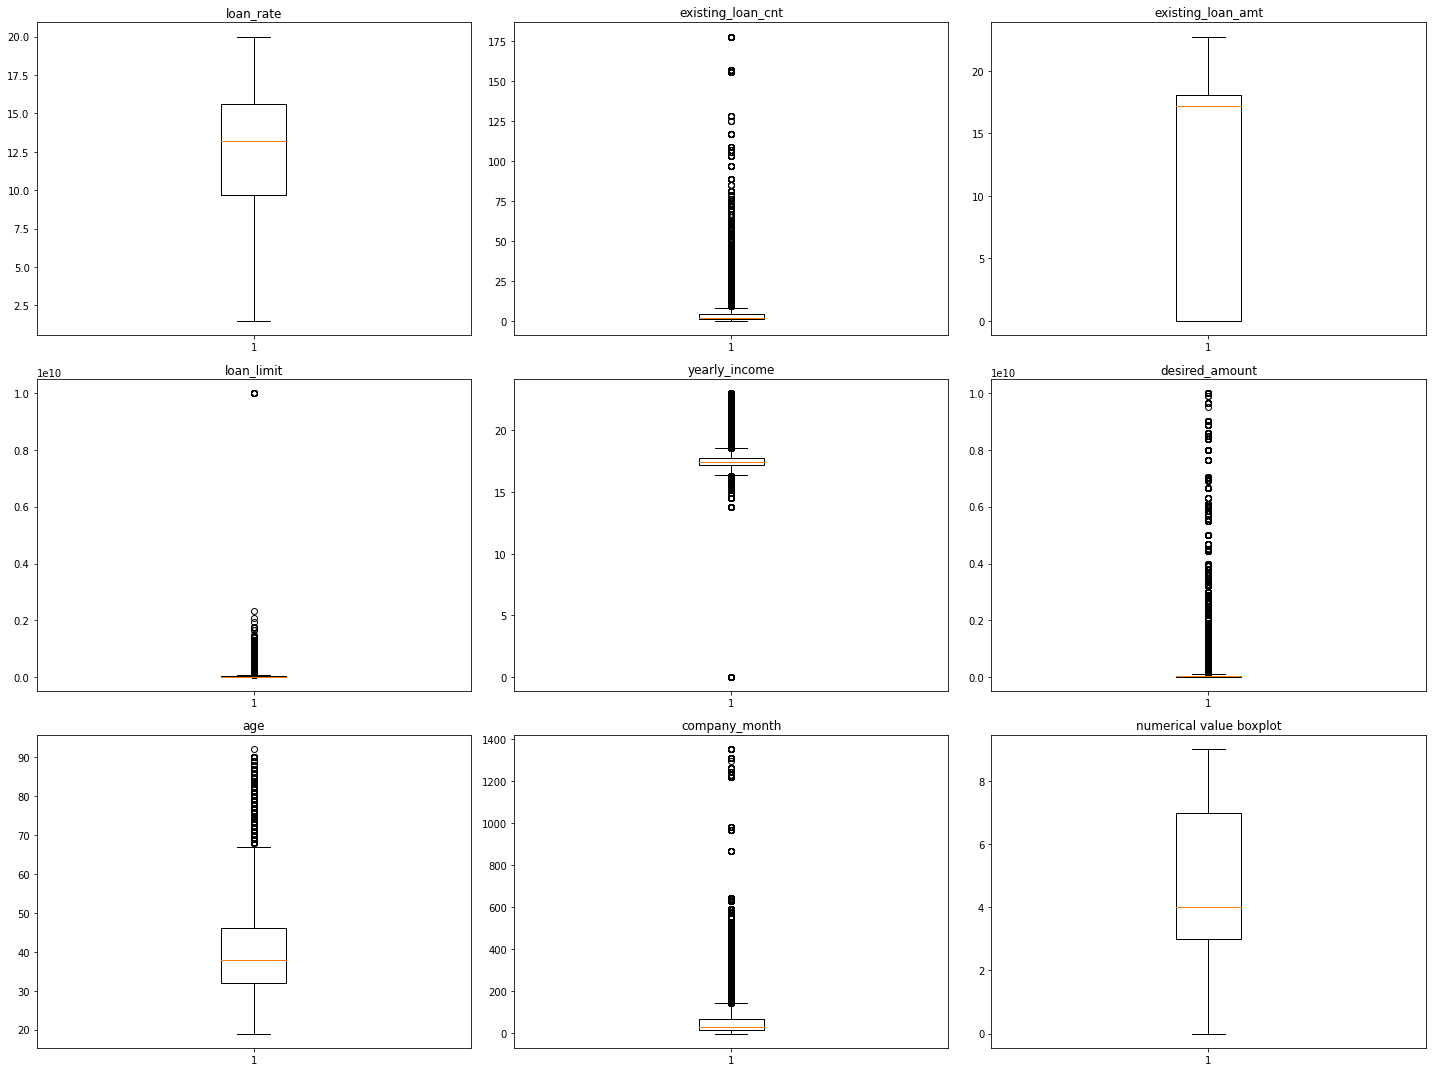

In [111]:
boxplot(figsize=(20, 15), plotnum=(3,3), 
        data=merge_train, col_list=num_col, title="numerical value boxplot")

##### yearly_income 0인 row 확인

In [112]:
df = search_row(merge_train, merge_train.yearly_income == 0)
df.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,gender,insert_time,...,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,age,credit_score_cut,company_month,personal_rehabilitation
14826,1978734,2022-05-09 18:09:12,15,204,5000000.0,13.9,0.0,629950.0,0.0,2022-05-09 18:09:10,...,ETC,RENT,3000000.0,HOUSEDEPOSIT,1.0,0.000000,23.0,9,0,2
14827,1978734,2022-05-09 18:09:11,35,29,5000000.0,17.4,0.0,629950.0,0.0,2022-05-09 18:09:10,...,ETC,RENT,3000000.0,HOUSEDEPOSIT,1.0,0.000000,23.0,9,0,2
14828,1978734,2022-05-09 18:09:11,13,123,3000000.0,20.0,0.0,629950.0,0.0,2022-05-09 18:09:10,...,ETC,RENT,3000000.0,HOUSEDEPOSIT,1.0,0.000000,23.0,9,0,2
15519,821680,2022-05-09 23:21:42,29,265,3000000.0,10.9,1.0,675403.0,0.0,2022-05-09 23:21:41,...,ETC,RENT,5000000.0,SWITCHLOAN,11.0,16.705882,26.0,4,0,2
15520,821680,2022-05-09 23:21:42,13,123,9000000.0,20.0,1.0,675403.0,0.0,2022-05-09 23:21:41,...,ETC,RENT,5000000.0,SWITCHLOAN,11.0,16.705882,26.0,4,0,2


In [113]:
df['employment_type'].unique()

array(['ETC', 'PERMANENT', 'CONTRACT', 'DAYJOB'], dtype=object)

In [114]:
df2 = search_row(df, df.employment_type == 'PERMANENT')
df2

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,gender,insert_time,...,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,age,credit_score_cut,company_month,personal_rehabilitation
31871,1620402,2022-05-09 18:58:40,19,127,7000000.0,9.4,0.0,535516.0,1.0,2022-05-09 18:58:32,...,PERMANENT,FAMILY_ETC,10000000.0,LIVING,4.0,17.182806,24.0,2,9,2
50586,1377926,2022-05-11 11:08:54,13,262,48000000.0,15.0,0.0,572747.0,0.0,2022-05-11 11:08:54,...,PERMANENT,OWN,15000000.0,LIVING,0.0,0.000000,38.0,5,95,2
50587,1377926,2022-05-11 11:08:56,37,206,8000000.0,19.9,0.0,572747.0,0.0,2022-05-11 11:08:54,...,PERMANENT,OWN,15000000.0,LIVING,0.0,0.000000,38.0,5,95,2
50588,1377926,2022-05-11 11:08:54,59,150,14000000.0,14.0,0.0,572747.0,0.0,2022-05-11 11:08:54,...,PERMANENT,OWN,15000000.0,LIVING,0.0,0.000000,38.0,5,95,2
50589,1377926,2022-05-11 11:08:54,50,142,22000000.0,14.0,0.0,572747.0,0.0,2022-05-11 11:08:54,...,PERMANENT,OWN,15000000.0,LIVING,0.0,0.000000,38.0,5,95,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13434395,2079783,2022-05-16 13:39:35,52,187,3000000.0,5.4,0.0,827523.0,1.0,2022-05-16 13:39:22,...,PERMANENT,OWN,10000000.0,LIVING,6.0,18.957174,42.0,8,215,2
13434396,2079783,2022-05-16 13:39:40,34,215,40000000.0,11.9,0.0,827523.0,1.0,2022-05-16 13:39:22,...,PERMANENT,OWN,10000000.0,LIVING,6.0,18.957174,42.0,8,215,2
13434397,2079783,2022-05-16 13:39:23,13,262,18000000.0,17.5,0.0,827523.0,1.0,2022-05-16 13:39:22,...,PERMANENT,OWN,10000000.0,LIVING,6.0,18.957174,42.0,8,215,2
13434398,2079783,2022-05-16 13:39:24,42,258,29000000.0,10.6,0.0,827523.0,1.0,2022-05-16 13:39:22,...,PERMANENT,OWN,10000000.0,LIVING,6.0,18.957174,42.0,8,215,2


In [115]:
df2.groupby('user_id').count()['application_id']

user_id
1216.0      22
10044.0      2
15336.0      2
16640.0     20
19538.0     10
            ..
869740.0     6
870231.0    12
872721.0     1
877375.0     4
878450.0     8
Name: application_id, Length: 247, dtype: int64

In [116]:
search_row(df2, df2.is_applied==1)

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,gender,insert_time,...,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,age,credit_score_cut,company_month,personal_rehabilitation
72200,203905,2022-04-29 16:35:16,59,150,1.800000e+07,16.300000,1.0,40561.0,0.0,2022-04-29 16:35:16,...,PERMANENT,FAMILY_ETC,5000000.0,ETC,3.0,16.588099,25.0,3,5,2
84523,1805951,2022-04-23 17:46:00,14,197,2.000000e+06,17.300000,1.0,24718.0,1.0,2022-04-23 17:45:59,...,PERMANENT,RENT,2000000.0,LIVING,2.0,14.914123,23.0,4,6,2
204613,1504255,2022-04-23 13:52:29,59,251,9.000000e+06,6.500000,1.0,692898.0,1.0,2022-04-23 13:52:29,...,PERMANENT,FAMILY_ETC,1000000.0,LIVING,5.0,16.380460,24.0,2,25,2
204616,79368,2022-04-23 23:33:31,59,251,9.000000e+06,6.500000,1.0,692898.0,1.0,2022-04-23 23:33:30,...,PERMANENT,FAMILY_ETC,1000000.0,LIVING,5.0,16.380460,24.0,2,10,2
209166,1602911,2022-05-29 12:46:20,19,127,1.200000e+07,9.400000,1.0,469866.0,1.0,2022-05-29 12:46:12,...,PERMANENT,RENT,40000000.0,SWITCHLOAN,9.0,18.005165,35.0,2,75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13427771,1537214,2022-05-09 15:59:13,49,136,8.000000e+06,6.500000,1.0,512627.0,1.0,2022-05-09 15:58:48,...,PERMANENT,RENT,10000000.0,LIVING,7.0,17.942645,42.0,4,56,2
13427775,1537214,2022-05-09 15:58:49,59,251,1.200000e+07,6.700000,1.0,512627.0,1.0,2022-05-09 15:58:48,...,PERMANENT,RENT,10000000.0,LIVING,7.0,17.942645,42.0,4,56,2
13427779,1487662,2022-05-09 18:59:31,59,251,9.000000e+06,6.700000,1.0,512627.0,1.0,2022-05-09 18:59:31,...,PERMANENT,RENT,8000000.0,ETC,7.0,17.942645,42.0,4,56,2
13427783,1487662,2022-05-09 18:59:33,36,103,9.000000e+06,6.900000,1.0,512627.0,1.0,2022-05-09 18:59:31,...,PERMANENT,RENT,8000000.0,ETC,7.0,17.942645,42.0,4,56,2


정규직인데 연소득이 0으로 잡히는 경우??

##### loan_limit 최대치인 row 확인

In [117]:
merge_train['loan_limit'].max()

10000000000.0

In [118]:
df = search_row(merge_train, merge_train.loan_limit == merge_train['loan_limit'].max())
df

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,gender,insert_time,...,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,age,credit_score_cut,company_month,personal_rehabilitation
100211,639784,2022-03-01 14:33:29,43,246,1.000000e+10,9.9,1.0,449938.0,1.0,2022-03-01 14:33:27,...,PERMANENT,OWN,100000000.0,LIVING,1.0,0.000000,54.0,4,212,2
649426,1934129,2022-04-04 23:50:05,43,246,1.000000e+10,9.9,1.0,796150.0,1.0,2022-04-04 23:50:04,...,PERMANENT,FAMILY_ETC,5000000.0,LIVING,14.0,17.426428,32.0,3,104,2
846383,54458,2022-03-10 19:48:54,43,246,1.000000e+10,9.9,1.0,550872.0,1.0,2022-03-10 19:48:53,...,PERMANENT,RENT,20000000.0,SWITCHLOAN,7.0,18.469471,50.0,4,187,2
1400183,590360,2022-03-10 15:30:21,43,246,1.000000e+10,9.9,0.0,529950.0,1.0,2022-03-10 15:30:19,...,PERMANENT,RENT,100000000.0,SWITCHLOAN,5.0,18.348110,45.0,3,22,2
2538000,1687312,2022-03-29 09:36:30,43,246,1.000000e+10,9.9,0.0,796150.0,1.0,2022-03-29 09:36:28,...,PERMANENT,FAMILY_ETC,3000000.0,LIVING,14.0,17.426428,32.0,3,104,2
5036011,1296652,2022-03-23 19:49:35,43,246,1.000000e+10,9.9,0.0,847796.0,1.0,2022-03-23 19:49:34,...,PERMANENT,OWN,5000000.0,LIVING,11.0,18.764270,31.0,2,101,1
5070370,497413,2022-03-23 08:49:06,43,246,1.000000e+10,9.9,1.0,226244.0,0.0,2022-03-23 08:49:04,...,PERMANENT,OWN,70000000.0,BUSINESS,5.0,20.241999,45.0,3,68,2
6998605,1480934,2022-03-11 14:01:20,43,246,1.000000e+10,9.9,0.0,550872.0,1.0,2022-03-11 14:01:18,...,PERMANENT,RENT,10000000.0,LIVING,7.0,18.469471,50.0,4,187,2
7966951,503070,2022-04-05 00:12:23,43,246,1.000000e+10,9.9,1.0,796150.0,1.0,2022-04-05 00:12:22,...,PERMANENT,FAMILY_ETC,5000000.0,LIVING,14.0,17.426428,32.0,3,104,2
9296603,2026384,2022-03-22 17:41:25,43,246,1.000000e+10,9.9,1.0,847796.0,1.0,2022-03-22 17:41:24,...,PERMANENT,OWN,70000000.0,SWITCHLOAN,11.0,18.764270,31.0,2,101,1


In [119]:
search_row(df, df.is_applied==1)

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,gender,insert_time,...,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,age,credit_score_cut,company_month,personal_rehabilitation
100211,639784,2022-03-01 14:33:29,43,246,1.000000e+10,9.9,1.0,449938.0,1.0,2022-03-01 14:33:27,...,PERMANENT,OWN,100000000.0,LIVING,1.0,0.000000,54.0,4,212,2
649426,1934129,2022-04-04 23:50:05,43,246,1.000000e+10,9.9,1.0,796150.0,1.0,2022-04-04 23:50:04,...,PERMANENT,FAMILY_ETC,5000000.0,LIVING,14.0,17.426428,32.0,3,104,2
846383,54458,2022-03-10 19:48:54,43,246,1.000000e+10,9.9,1.0,550872.0,1.0,2022-03-10 19:48:53,...,PERMANENT,RENT,20000000.0,SWITCHLOAN,7.0,18.469471,50.0,4,187,2
5070370,497413,2022-03-23 08:49:06,43,246,1.000000e+10,9.9,1.0,226244.0,0.0,2022-03-23 08:49:04,...,PERMANENT,OWN,70000000.0,BUSINESS,5.0,20.241999,45.0,3,68,2
7966951,503070,2022-04-05 00:12:23,43,246,1.000000e+10,9.9,1.0,796150.0,1.0,2022-04-05 00:12:22,...,PERMANENT,FAMILY_ETC,5000000.0,LIVING,14.0,17.426428,32.0,3,104,2
9296603,2026384,2022-03-22 17:41:25,43,246,1.000000e+10,9.9,1.0,847796.0,1.0,2022-03-22 17:41:24,...,PERMANENT,OWN,70000000.0,SWITCHLOAN,11.0,18.764270,31.0,2,101,1
13332399,850504,2022-03-02 21:00:48,43,246,1.000000e+10,9.9,1.0,449938.0,1.0,2022-03-02 21:00:46,...,PERMANENT,OWN,100000000.0,LIVING,1.0,0.000000,54.0,4,212,2


### 1차 전처리 데이터프레임 생성

In [90]:
merge_train.isnull().sum()

application_id             0
loanapply_insert_time      0
bank_id                    0
product_id                 0
loan_limit                 0
loan_rate                  0
is_applied                 0
user_id                    0
gender                     0
insert_time                0
yearly_income              0
income_type                0
employment_type            0
houseown_type              0
desired_amount             0
purpose                    0
existing_loan_cnt          0
existing_loan_amt          0
age                        0
credit_score_cut           0
company_month              0
personal_rehabilitation    0
dtype: int64

In [91]:
merge_target.isnull().sum()

application_id                   0
loanapply_insert_time            0
bank_id                          0
product_id                       0
loan_limit                       0
loan_rate                        0
is_applied                 3257239
user_id                          0
gender                           0
insert_time                      0
yearly_income                    0
income_type                      0
employment_type                  0
houseown_type                    0
desired_amount                   0
purpose                          0
existing_loan_cnt                0
existing_loan_amt                0
age                              0
credit_score_cut                 0
company_month                    0
personal_rehabilitation          0
dtype: int64

예측해야 할 target값을 제외하고 결측치 모두가 제거되었음을 알 수 있다.

In [92]:
def save_data(data, file_name, DATA_PATH=DATA_PATH):
  file_path = os.path.join(DATA_PATH, file_name)
  print(file_path)
  return data.to_csv(file_path, index=False)

In [93]:
save_data(merge_train, 'merge_train.csv')
save_data(merge_target, 'merge_target.csv')

/content/gdrive/My Drive/빅콘테스트_2022/data/merge_train.csv
/content/gdrive/My Drive/빅콘테스트_2022/data/merge_target.csv


### 전처리 파이프라인 생성

In [ ]:
# 전처리 과정 완료 후 파이프라인 생성 예정

## 모델링 및 평가

베이스라인 트리 기반 모델 사용.

* RandomForest

* XGBoost

* LightGBM

### train-validation split

### RandomForest

### XGBoost

### LightGBM

### 성능 평가표

### 하이퍼파라미터 튜닝

### 앙상블

## 최종 예측 & 파일 생성